In [12]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def f(x):
    return 3*x**2 - 4*x + 5

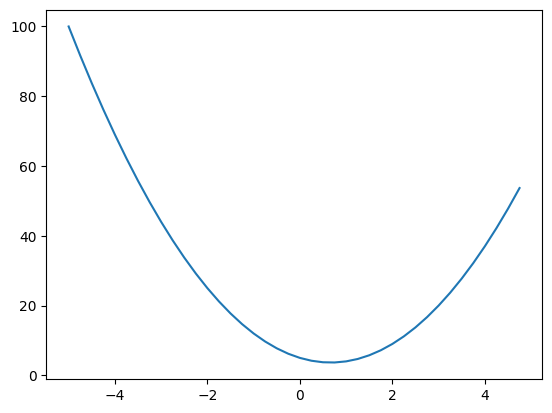

In [9]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [12]:
h = 0.001
x = -3.0
(f(x + h) - f(x))/h

-21.996999999998934

In [14]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [17]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)


d1 4.0
d2 4.0002
slope 2.0000000000042206


In [9]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [110]:
a = Value(2.0)
b = Value(4.0)
a-b

Value(data=-2.0)

In [3]:
d._op

'+'

In [40]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right\n",

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
        # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
      # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

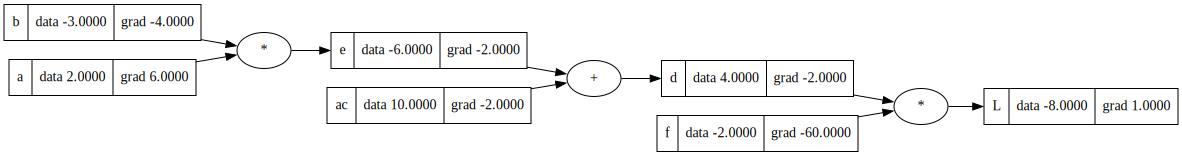

In [29]:
draw_dot(L)

In [31]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a*b
d = e+c
L = d * f

print(L.data)

-10.977280000000002


In [28]:
a.grad = (-2.0 * -3.0)
b.grad = (-2.0 * 2.0)

In [12]:
def lol():
    
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='ac')
    d = a * b + c
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0 , label ='f')
    L = d * f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='ac')
    d = a * b + c
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0 , label ='f')
    L = d * f; L.label = 'L'
    L2 = L.data + h
    
    print (L2-L1);
    print((L2-L1)/h)

lol()

9.999999999976694e-05
0.9999999999976694


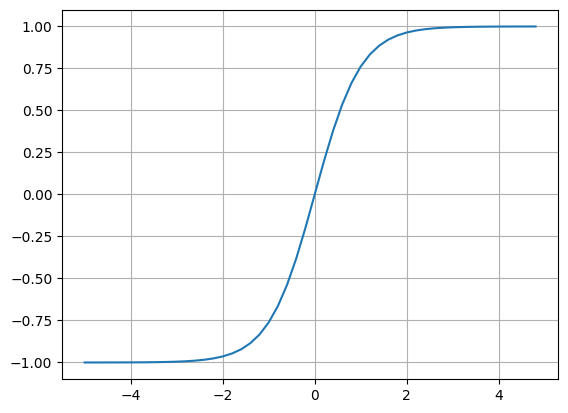

In [34]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid();

In [112]:
#inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
#weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
#bias of the neuron
b = Value(6.884513513516544987545, label='b')

x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

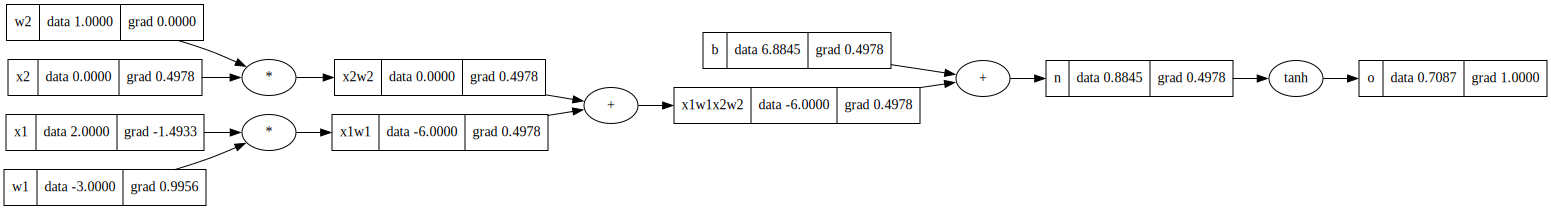

In [113]:
draw_dot(o)

In [82]:
o._backward()

In [60]:
#o = tanh(n)
#do/dn = d(tanh(x)/dn = 1 - tanh(n)^2 = 1 - o**2
n.grad = 1-o.data**2

In [61]:
x1w1x2w2.grad = n.grad
b.grad = n.grad
x1w1.grad = n.grad
x2w2.grad = n.grad

In [64]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [66]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [71]:
o.grad = 1.0

In [75]:
n._backward()

In [77]:
b._backward()

In [79]:
x1w1x2w2._backward()

In [81]:
x1w1._backward()
x2w2._backward()

In [86]:
topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)
topo

[Value(data=6.884513513516545),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.884513513516545),
 Value(data=0.7086732612886939)]

In [95]:
o.backward()

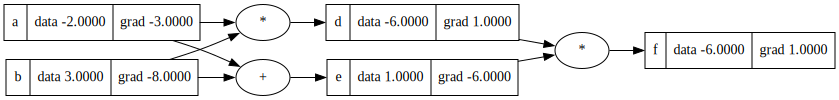

In [99]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()

draw_dot(f)

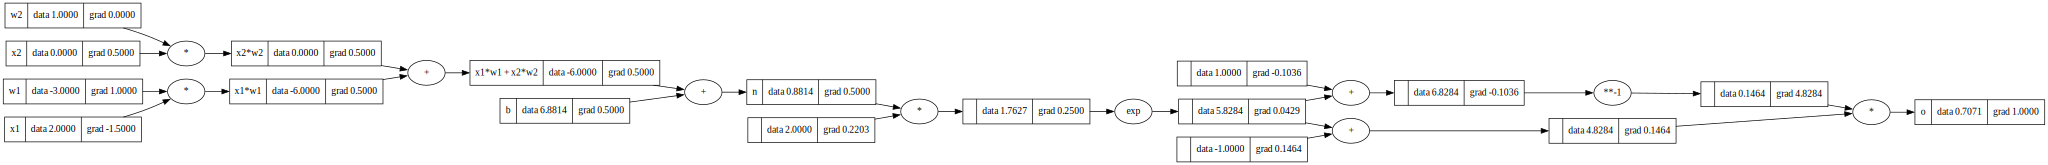

In [130]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

In [1]:
import torch

In [3]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [6]:
z = torch.Tensor([[1,2,3],[2,3,4]])
z.shape

torch.Size([2, 3])

In [14]:
w = [Value(random.uniform(-1,1)) for _ in range(5)]
print(w)

[Value(data=-0.34855499092153175), Value(data=0.7450591651012617), Value(data=0.5197074098469592), Value(data=0.18492096540517533), Value(data=0.6065672311927108)]


In [57]:
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
    
    def __call__(self, x):
        #return w * x + b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    
    def __call__ (self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
      return [p for neuron in self.neurons for p in neuron.parameters()]
            
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
      return [p for layer in self.layers for p in layer.parameters()]


In [63]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets



[Value(data=-0.7236414183267882),
 Value(data=-0.34809024328098725),
 Value(data=-0.7225353154530603),
 Value(data=-0.7389145702434233)]

In [66]:
loss.backward()

In [64]:
ypred = [n(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=6.496736603652627)

In [71]:
ypred = [n(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=5.9179076141747835)

In [67]:
n.layers[0].neurons[0].w[0].grad

-0.24296547888890235

In [140]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.8595078493562887)

In [68]:
n.layers[0].neurons[0].w[0].data

-0.32220486829270323

In [69]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [70]:
n.layers[0].neurons[0].w[0].data

-0.3197752135038142

In [132]:
ypred = [n(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=0.001163807505401968)

In [133]:
loss.backward()

In [134]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [135]:
ypred

[Value(data=0.9915277525145806),
 Value(data=-0.9672062837912311),
 Value(data=-0.9982361528871353),
 Value(data=0.9963271879262698)]

In [163]:
for k in range(100):
    #forward pass
    ypred = [n(x) for x in xs]
    loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
    
    #backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
    
    #update
    for p in n.parameters():
        p.data += -0.1 * p.grad
    
    print(k, loss.data)
    
    

0 0.00049586055380013
1 0.0004948734122280188
2 0.0004938900906851316
3 0.0004929105672759713
4 0.0004919348202710998
5 0.0004909628281055094
6 0.0004899945693771147
7 0.0004890300228452045
8 0.00048806916742895204
9 0.0004871119822058722
10 0.0004861584464104161
11 0.000485208539432428
12 0.0004842622408157602
13 0.00048331953025681574
14 0.0004823803876031299
15 0.00048144479285200706
16 0.0004805127261490871
17 0.00047958416778700024
18 0.00047865909820405295
19 0.00047773749798280636
20 0.00047681934784883184
21 0.00047590462866936264
22 0.0004749933214520068
23 0.00047408540734347054
24 0.00047318086762829475
25 0.00047227968372759606
26 0.00047138183719780944
27 0.00047048730972951993
28 0.00046959608314617904
29 0.0004687081394029684
30 0.00046782346058556526
31 0.0004669420289089931
32 0.00046606382671647074
33 0.0004651888364782213
34 0.00046431704079040903
35 0.0004634484223739265
36 0.000462582964073351
37 0.00046172064885582
38 0.0004608614598099398
39 0.0004600053801447110

In [164]:
ypred

[Value(data=0.9907227932806424),
 Value(data=-0.9938199709112892),
 Value(data=-0.9886951287341473),
 Value(data=0.9872838429022495)]